#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [ ]:
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib
!pip install aisp

In [1]:
# Importando a seleção negativa.
from aisp.NSA import RNSA

# Importando os demais pacotes. 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### **2. Função para normalizar os dados entre 0 e 1**

In [2]:
# função para normalizar os dados utilizando funções do scikit-learn.
def normalizeDados(dados):
    scaler = MinMaxScaler().fit(dados)
    return scaler.transform(dados)

#### **3. Carregar a base de dados usando o pacote seaborn**

In [3]:
amostrasName = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris = sns.load_dataset('iris')
dados = np.array(iris.get(amostrasName))
classes = np.array(iris.get('species'))

#### **4. Pré-processamento (Escala das entradas [0, 1])**

##### **4.1 Separação de treinamento e teste (30% para teste)**

In [4]:
# Normalizando os dados entre 0 e 1
dados = normalizeDados(dados)
# Gerando os conjuntos de treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(dados, classes, test_size=0.30)

# RNSA Raio fixo

#### **5. Validação Cruzada.**

In [5]:
accuracy_list = list()

# Inicialização do Modelo
nsa = RNSA(N=350, r=0.35)
for i in range(0, 50):
    # Dividir o conjunto de treinamento, separando 1/10 dos dados para validação.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Ajustar o modelo usando os outros 90% dos dados
    nsa.fit(train_model_x, train__model_y, verbose=False)

    # Calculo de acurácia para conjunto de validação: 
    prev_y = nsa.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Exibir a acurácia média e seu desvio padrão
print(f"A acuracia media é: {np.average(np.array(accuracy_list)):.6f}")
print(f"Desvio padrão das acuracias: {np.std(np.array(accuracy_list)):.6f}")

A acuracia media é: 0.890909
Desvio padrão das acuracias: 0.092709


**6. Ajuste do modelo usando o conjunto de treinamento no seu total**

In [6]:
# Criando o modelo com todos os dados separados para treinamento.
nsa.fit(train_x, train_y)
print('Modelo Total Ajustado!')

✔ Non-self detectors for classes (setosa, versicolor, virginica) successfully generated:  ┇██████████┇ 1050/1050 detectors

Modelo Total Ajustado!


**7. Exibir relatório e matriz de confusão para o conjunto de teste**

A acuracia é 0.9111111111111111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.93      0.82      0.87        17
   virginica       0.79      0.92      0.85        12

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



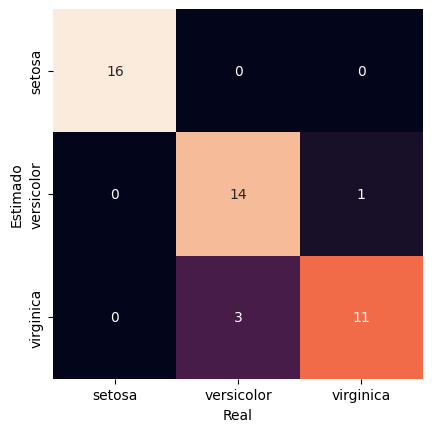

In [7]:
# Prevendo às classes com as amostras de teste.
prev_y = nsa.predict(test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acuracia é {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()

# RNSA Raio Variável

#### **8. Validação Cruzada.**

In [8]:
accuracy_list = list()

# Inicialização do Modelo
nsa = RNSA(N=350, r=0.30, r_s=0.05, algorithm='V-detector')
for i in range(0, 50):
    # Dividir o conjunto de treinamento, separando 1/10 dos dados para validação.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Ajustar o modelo usando os outros 90% dos dados
    nsa.fit(train_model_x, train__model_y, verbose=False)

    # Calculo de acurácia para conjunto de validação: 
    prev_y = nsa.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Exibir a acurácia média e seu desvio padrão
print(f"A acuracia media é: {np.average(np.array(accuracy_list)):.6f}")
print(f"Desvio padrão das acuracias: {np.std(np.array(accuracy_list)):.6f}")

A acuracia media é: 0.905455
Desvio padrão das acuracias: 0.083240


**9. Ajuste do modelo usando o conjunto de treinamento no seu total**

In [9]:
# Criando o modelo com todos os dados separados para treinamento.
nsa.fit(train_x, train_y)
print('Modelo Total Ajustado!')

✔ Non-self detectors for classes (setosa, versicolor, virginica) successfully generated:  ┇██████████┇ 1050/1050 detectors

Modelo Total Ajustado!


**10. Exibir relatório e matriz de confusão para o conjunto de teste**

A acuracia é 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



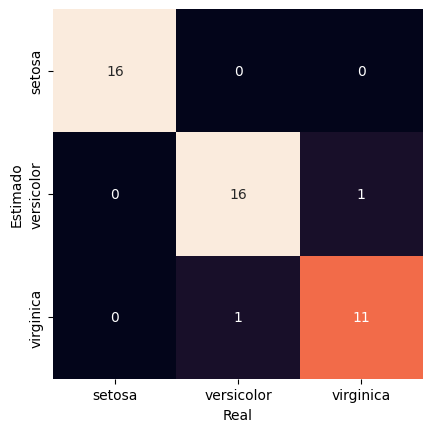

In [10]:
# Prevendo às classes com as amostras de teste.
prev_y = nsa.predict(test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acuracia é {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()